# 📊 Comparative Analysis of Netflix, Amazon Prime, and Disney+ OTT Platforms

## ✅ Objective
To compare the content libraries of Netflix, Amazon Prime, and Disney+ based on content type, genres, ratings, durations, and other trends.

---


## ✅ Import Libraries

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


## ✅ Load the Datasets

In [45]:
netflix = pd.read_csv('cleaned_netflix_data.csv')
amazon = pd.read_csv('cleaned_amazon_data.csv')
disney = pd.read_csv('cleaned_disney+_data.csv')


## ✅ Inspect the Data

In [46]:
netflix.head()
amazon.head()
disney.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,added_year,genre,actor
0,s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"Alonso Ramirez Ramos, Dave Wasson","Chris Diamantopoulos, Tony Anselmo, Tress MacN...",Unknown,2021-11-26,2016,TV-G,23 min,"Animation, Family",Join Mickey and the gang as they duck the halls!,2021,Animation,Chris Diamantopoulos
1,s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"Alonso Ramirez Ramos, Dave Wasson","Chris Diamantopoulos, Tony Anselmo, Tress MacN...",Unknown,2021-11-26,2016,TV-G,23 min,"Animation, Family",Join Mickey and the gang as they duck the halls!,2021,Animation,Tony Anselmo
2,s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"Alonso Ramirez Ramos, Dave Wasson","Chris Diamantopoulos, Tony Anselmo, Tress MacN...",Unknown,2021-11-26,2016,TV-G,23 min,"Animation, Family",Join Mickey and the gang as they duck the halls!,2021,Animation,Tress MacNeille
3,s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"Alonso Ramirez Ramos, Dave Wasson","Chris Diamantopoulos, Tony Anselmo, Tress MacN...",Unknown,2021-11-26,2016,TV-G,23 min,"Animation, Family",Join Mickey and the gang as they duck the halls!,2021,Animation,Bill Farmer
4,s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"Alonso Ramirez Ramos, Dave Wasson","Chris Diamantopoulos, Tony Anselmo, Tress MacN...",Unknown,2021-11-26,2016,TV-G,23 min,"Animation, Family",Join Mickey and the gang as they duck the halls!,2021,Animation,Russi Taylor


## ✅ Add Platform Column
To identify the platform in combined analysis.

In [47]:
netflix['Platform'] = 'Netflix'
amazon['Platform'] = 'Amazon'
disney['Platform'] = 'Disney+'


## ✅ Combine the DataFrames

In [48]:
df = pd.concat([netflix, amazon, disney], ignore_index=True)
df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,added_year,genre,actor,year_gap,listed_in_split,Platform
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,"Jace Chapman, Larisa Oleynik, Tom Everett Scot...",Netherlands,2018-10-12,2015,TV-14,112 min,"Comedies, International Movies, Romantic Movies","Chipper baby boomer Kath, diva daughter Kim an...",2018.0,Comedies,Jace Chapman,3.0,"['Comedies', 'International Movies', 'Romantic...",Netflix
1,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,"Jace Chapman, Larisa Oleynik, Tom Everett Scot...",Netherlands,2018-10-12,2015,TV-14,112 min,"Comedies, International Movies, Romantic Movies","Chipper baby boomer Kath, diva daughter Kim an...",2018.0,Comedies,Larisa Oleynik,3.0,"['Comedies', 'International Movies', 'Romantic...",Netflix
2,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,"Jace Chapman, Larisa Oleynik, Tom Everett Scot...",Netherlands,2018-10-12,2015,TV-14,112 min,"Comedies, International Movies, Romantic Movies","Chipper baby boomer Kath, diva daughter Kim an...",2018.0,Comedies,Tom Everett Scott,3.0,"['Comedies', 'International Movies', 'Romantic...",Netflix
3,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,"Jace Chapman, Larisa Oleynik, Tom Everett Scot...",Netherlands,2018-10-12,2015,TV-14,112 min,"Comedies, International Movies, Romantic Movies","Chipper baby boomer Kath, diva daughter Kim an...",2018.0,Comedies,Steve Zahn,3.0,"['Comedies', 'International Movies', 'Romantic...",Netflix
4,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,"Jace Chapman, Larisa Oleynik, Tom Everett Scot...",Netherlands,2018-10-12,2015,TV-14,112 min,"Comedies, International Movies, Romantic Movies","Chipper baby boomer Kath, diva daughter Kim an...",2018.0,Comedies,Mauricio Lara,3.0,"['Comedies', 'International Movies', 'Romantic...",Netflix


#### Split the Listed in and cast column

In [49]:
df_cast = df[['title', 'cast']].dropna().copy()

# Split cast string by comma and explode to rows
df_cast['cast'] = df_cast['cast'].str.split(', ')
df_cast = df_cast.explode('cast')

# Remove 'unknown' or any empty values
df_cast['cast'] = df_cast['cast'].str.strip()
df_cast = df_cast[df_cast['cast'].str.lower() != 'unknown']
df_cast = df_cast[df_cast['cast'] != '']

# remove duplicates
df_cast.drop_duplicates(inplace=True)

df_genres = df[['title', 'listed_in']].dropna().copy()

# Split genre string and explode
df_genres['genre'] = df_genres['listed_in'].str.split(', ')
df_genres = df_genres.explode('genre')

# Clean genre column
df_genres['genre'] = df_genres['genre'].str.strip()
df_genres = df_genres[df_genres['genre'].str.lower() != 'unknown']
df_genres = df_genres[df_genres['genre'] != '']

# drop duplicates
df_genres.drop_duplicates(inplace=True)


#### Add the splited column to original data

In [50]:
df = df.dropna(subset=['listed_in']).copy()
df['genre'] = df['listed_in'].str.split(', ')
df = df.explode('genre')
df['genre'] = df['genre'].str.strip()
df = df.dropna(subset=['cast']).copy()
df['actor'] = df['cast'].str.split(', ')
df = df.explode('actor')
df['actor'] = df['actor'].str.strip()

In [51]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,added_year,genre,actor,year_gap,listed_in_split,Platform
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,"Jace Chapman, Larisa Oleynik, Tom Everett Scot...",Netherlands,2018-10-12,2015,TV-14,112 min,"Comedies, International Movies, Romantic Movies","Chipper baby boomer Kath, diva daughter Kim an...",2018.0,Comedies,Jace Chapman,3.0,"['Comedies', 'International Movies', 'Romantic...",Netflix
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,"Jace Chapman, Larisa Oleynik, Tom Everett Scot...",Netherlands,2018-10-12,2015,TV-14,112 min,"Comedies, International Movies, Romantic Movies","Chipper baby boomer Kath, diva daughter Kim an...",2018.0,Comedies,Larisa Oleynik,3.0,"['Comedies', 'International Movies', 'Romantic...",Netflix
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,"Jace Chapman, Larisa Oleynik, Tom Everett Scot...",Netherlands,2018-10-12,2015,TV-14,112 min,"Comedies, International Movies, Romantic Movies","Chipper baby boomer Kath, diva daughter Kim an...",2018.0,Comedies,Tom Everett Scott,3.0,"['Comedies', 'International Movies', 'Romantic...",Netflix
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,"Jace Chapman, Larisa Oleynik, Tom Everett Scot...",Netherlands,2018-10-12,2015,TV-14,112 min,"Comedies, International Movies, Romantic Movies","Chipper baby boomer Kath, diva daughter Kim an...",2018.0,Comedies,Steve Zahn,3.0,"['Comedies', 'International Movies', 'Romantic...",Netflix
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,"Jace Chapman, Larisa Oleynik, Tom Everett Scot...",Netherlands,2018-10-12,2015,TV-14,112 min,"Comedies, International Movies, Romantic Movies","Chipper baby boomer Kath, diva daughter Kim an...",2018.0,Comedies,Mauricio Lara,3.0,"['Comedies', 'International Movies', 'Romantic...",Netflix


# ✅ Basic Info


In [52]:
df['added_year'] = pd.to_numeric(df['added_year'], errors='coerce')
df['added_year'] = df['added_year'].astype('Int64') 
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
Index: 6112630 entries, 0 to 250013
Data columns (total 18 columns):
 #   Column           Dtype  
---  ------           -----  
 0   show_id          object 
 1   type             object 
 2   title            object 
 3   director         object 
 4   cast             object 
 5   country          object 
 6   date_added       object 
 7   release_year     int64  
 8   rating           object 
 9   duration         object 
 10  listed_in        object 
 11  description      object 
 12  added_year       Int64  
 13  genre            object 
 14  actor            object 
 15  year_gap         float64
 16  listed_in_split  object 
 17  Platform         object 
dtypes: Int64(1), float64(1), int64(1), object(15)
memory usage: 891.9+ MB
None
       release_year   added_year      year_gap
count  6.112630e+06    4053483.0  3.793716e+06
mean   2.008940e+03  2018.668961  4.948621e+00
std    1.750567e+01      1.36479  6.590469e+00
min    1.920000e+03      

In [53]:
df.to_csv("cleaned_streaming_data.csv", index=False)

# Exploratory Analysis

##  Content Type Distribution

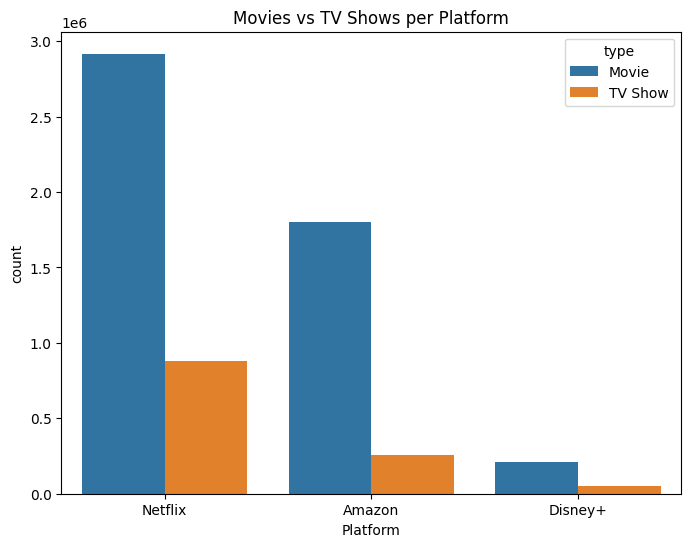

In [54]:
plt.figure(figsize=(8,6))
sns.countplot(x='Platform', hue='type', data=df)
plt.title('Movies vs TV Shows per Platform')
plt.show()

## Ratings ditribution

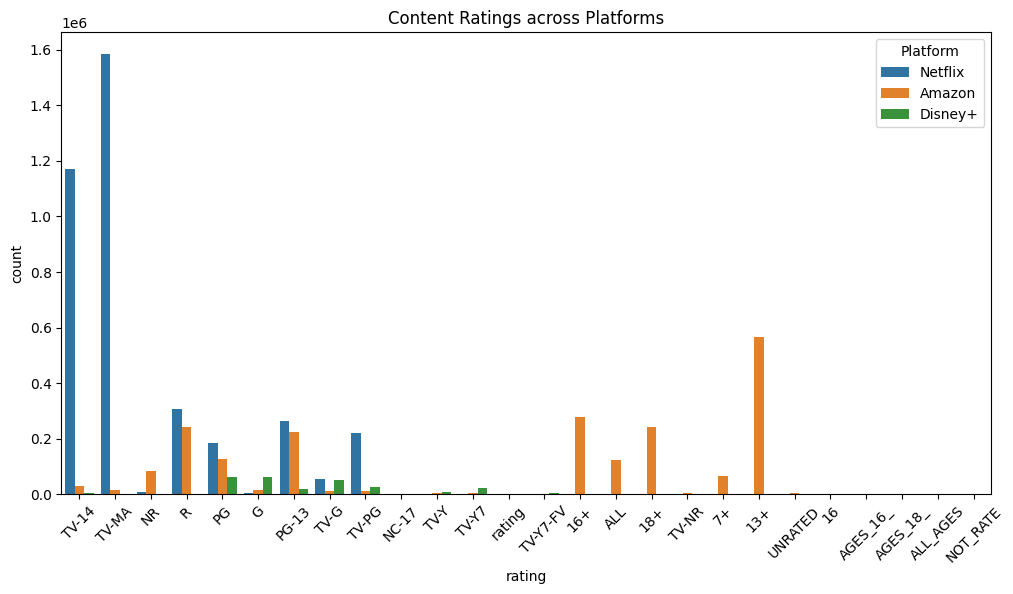

In [55]:
plt.figure(figsize=(12,6))
sns.countplot(x='rating', hue='Platform', data=df)
plt.title('Content Ratings across Platforms')
plt.xticks(rotation=45)
plt.show()

## Extract Duration for Movies and TV Shows

In [56]:
df_movies = df[df['type'] == 'Movie'].copy()
df_movies['duration_minutes'] = df_movies['duration'].str.extract('(\d+)').astype(float)

df_tv = df[df['type'] == 'TV Show'].copy()
df_tv['duration_seasons'] = df_tv['duration'].str.extract('(\d+)').astype(float)


In [57]:
print("Average Movie Duration per Platform:")
print(df_movies.groupby('Platform')['duration_minutes'].mean())

print("\nAverage TV Show Seasons per Platform:")
print(df_tv.groupby('Platform')['duration_seasons'].mean())


Average Movie Duration per Platform:
Platform
Amazon     102.460519
Disney+     87.639010
Netflix     62.883380
Name: duration_minutes, dtype: float64

Average TV Show Seasons per Platform:
Platform
Amazon      1.757273
Disney+     2.434681
Netflix    79.848357
Name: duration_seasons, dtype: float64


## Genre (listed_in) Analysis

In [58]:
def get_top_genres(data, genre):
    genre_series = data['genre'].dropna().str.split(', ')
    flat = [genre.strip() for sublist in genre_series for genre in sublist]
    return Counter(flat).most_common(5)

# Replace 'listed_in' with the actual column name from your datasets
print("Netflix Top Genres:", get_top_genres(netflix, 'genre'))
print("Amazon Top Genres:", get_top_genres(amazon, 'genre'))
print("Disney+ Top Genres:", get_top_genres(disney, 'genre'))



Netflix Top Genres: [('International Movies', 21765), ('Dramas', 19169), ('Comedies', 13641), ('International TV Shows', 10628), ('Documentaries', 7353)]
Amazon Top Genres: [('Drama', 21135), ('Comedy', 11224), ('Action', 9086), ('Suspense', 8660), ('Horror', 4316)]
Disney+ Top Genres: [('Comedy', 2584), ('Family', 2545), ('Action-Adventure', 2359), ('Animation', 2258), ('Coming of Age', 1166)]


## Release Year Trends

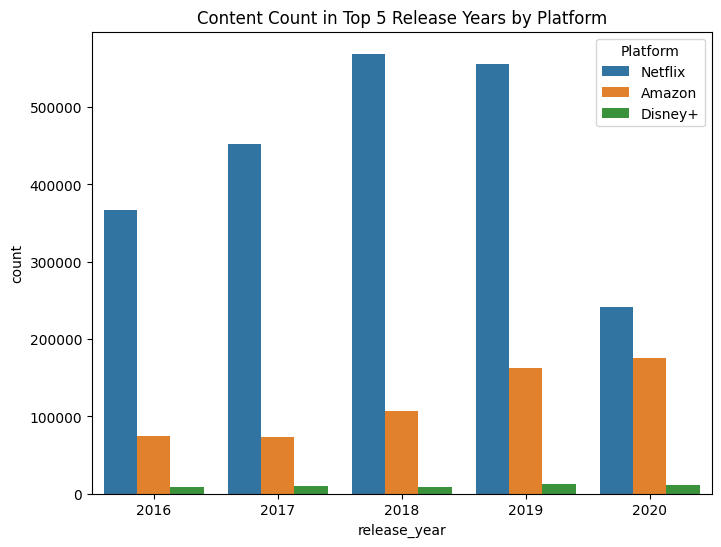

In [59]:
top_years = df['release_year'].value_counts().head(5).index
df_top_years = df[df['release_year'].isin(top_years)]
plt.figure(figsize=(8,6))
sns.countplot(x='release_year', hue='Platform', data=df_top_years, order=sorted(top_years))
plt.title('Content Count in Top 5 Release Years by Platform')
plt.show()


## Country-wise Content Distribution

In [60]:
df[df['country'] != 'Unknown']['country'].value_counts().head(10)

country
United States     1705185
India              486802
United Kingdom     170825
Japan              145843
South Korea        126779
Canada             122450
Mexico              73960
Nigeria             69595
Indonesia           54594
France              45507
Name: count, dtype: int64

## Average Movie Duration by Genre & Platform

In [61]:
df_movies = df[df['type'] == 'Movie'].copy()
df_movies['duration_minutes'] = df_movies['duration'].str.extract('(\d+)').astype(float)

df_movies.groupby(['Platform', 'genre'])['duration_minutes'].mean().sort_values(ascending=False).head(10)

Platform  genre                    
Netflix   Stand-Up Comedy              143.667702
Amazon    International                138.324236
Netflix   Documentaries                127.779504
          Science & Nature TV          125.196562
          Spanish-Language TV Shows    122.063746
Amazon    Fantasy                      120.280369
Netflix   TV Mysteries                 120.208675
Amazon    Romance                      116.768594
Disney+   Spy/Espionage                116.000000
Netflix   Docuseries                   114.766358
Name: duration_minutes, dtype: float64

## Most Featured Directors per Platform

In [62]:
for platform in df['Platform'].unique():
    print(f"\nTop Directors in {platform}")
    directors = df[(df['Platform'] == platform) & (df['director'] != 'Unknown')]['director']
    print(directors.value_counts().head(3))


Top Directors in Netflix
director
Manish Jha         23229
Daniel McCabe      19881
Martin Scorsese    18583
Name: count, dtype: int64

Top Directors in Amazon
director
Richard Whorf     52048
Tom Shadyac       47961
Peter Cattaneo    40000
Name: count, dtype: int64

Top Directors in Disney+
director
Paul Hoen           4176
Robert Stevenson    3888
Vincent McEveety    2880
Name: count, dtype: int64


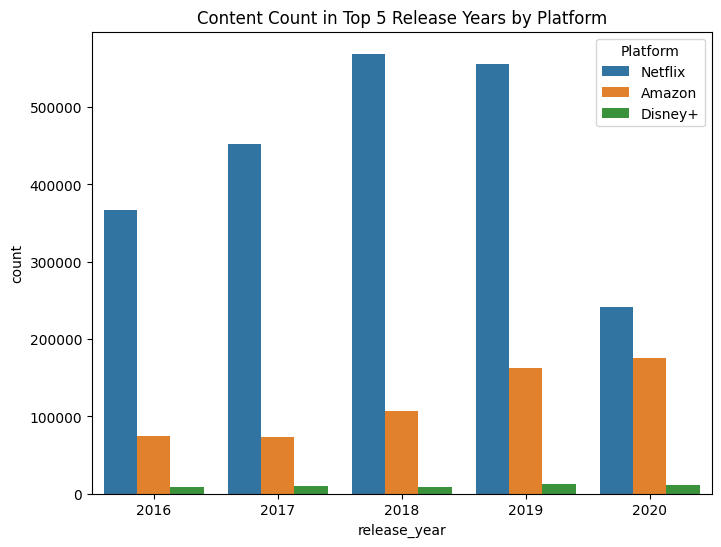

In [63]:
top_years = df['release_year'].value_counts().head(5).index
df_top_years = df[df['release_year'].isin(top_years)]
plt.figure(figsize=(8,6))
sns.countplot(x='release_year', hue='Platform', data=df_top_years, order=sorted(top_years))
plt.title('Content Count in Top 5 Release Years by Platform')
plt.show()

## FOR DASHBOARD

#### Total Titles per Platform

In [90]:
unique_titles = df[['title', 'Platform']].drop_duplicates()
platform_counts = unique_titles['Platform'].value_counts().sum()

print(platform_counts)


19910


#### Average Movie Duration

In [91]:
# Step-1: Separate Movies and TV Shows 
movies = df[df['type'] == 'Movie']
tv_shows = df[df['type'] == 'TV Show']

#Step-2: Extract duration in minutes for movie
movies = df[df['type'] == 'Movie'].copy()
movies['duration_minutes'] = movies['duration'].str.extract('(\d+)')
movies['duration_minutes'] = movies['duration_minutes'].astype(float)

#Step-3: Print the average movie duration
print("Average Movie duration is:", int(movies['duration_minutes'].mean()))


df = df.copy()

# Step 2: Initialize duration_minutes column with NaN
df['duration_minutes'] = None

# Step 3: Extract numeric duration only for movies
movie_mask = df['type'] == 'Movie'
df.loc[movie_mask, 'duration_minutes'] = (
    df.loc[movie_mask, 'duration']
    .str.extract(r'(\d+)')
    .astype(float)
)

# Optional: Check the result
print(df[['type', 'duration', 'duration_minutes']].head())

Average Movie duration is: 78
    type duration duration_minutes
0  Movie  112 min              NaN
1  Movie  112 min              NaN
2  Movie  112 min              NaN
3  Movie  112 min              NaN
4  Movie  112 min              NaN


#### Dominant Type

In [66]:
type_distribution = df['type'].value_counts()
print("Content Type Distribution:")
print(type_distribution)

Content Type Distribution:
type
Movie      4928916
TV Show    1183714
Name: count, dtype: int64


#### Most common genere

In [67]:
from collections import Counter

# If your column is named 'genre'
genre_series = df['genre'].dropna().str.split(', ')
flat_genres = [genre.strip() for sublist in genre_series for genre in sublist]
genre_counts = Counter(flat_genres)

# Convert to DataFrame
top_genres_df = pd.DataFrame(genre_counts.most_common(10), columns=['Genre', 'Count'])

# Preview
print(top_genres_df)

                    Genre   Count
0    International Movies  574301
1                  Dramas  499908
2                   Drama  482203
3                Comedies  357043
4  International TV Shows  323587
5                  Comedy  295042
6                Suspense  206556
7                  Action  200377
8      Independent Movies  181645
9      Action & Adventure  173863


#### Top release year

In [68]:
top_years = df['release_year'].value_counts().head(5)
print("Top 5 Release Years on Netflix:")
print(top_years)

Top 5 Release Years on Netflix:
release_year
2019    729711
2018    684998
2017    535057
2016    449342
2020    428645
Name: count, dtype: int64


#### 1)Content Release Trend by Year

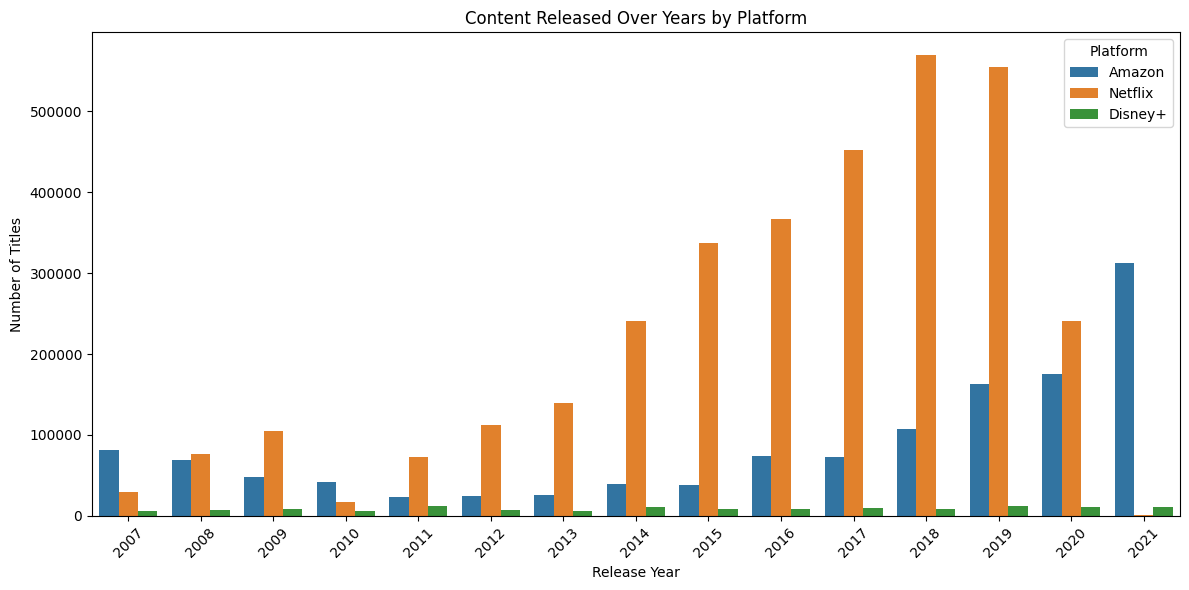

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

# Reset index to avoid duplicate label issues
df = df.reset_index(drop=True)

# Get last 15 years
year_order = sorted(df['release_year'].unique())[-15:]

# Plot
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='release_year', hue='Platform', order=year_order)
plt.xticks(rotation=45)
plt.title("Content Released Over Years by Platform")
plt.xlabel("Release Year")
plt.ylabel("Number of Titles")
plt.legend(title="Platform")
plt.tight_layout()
plt.show()

#### 2)Rating Distribution

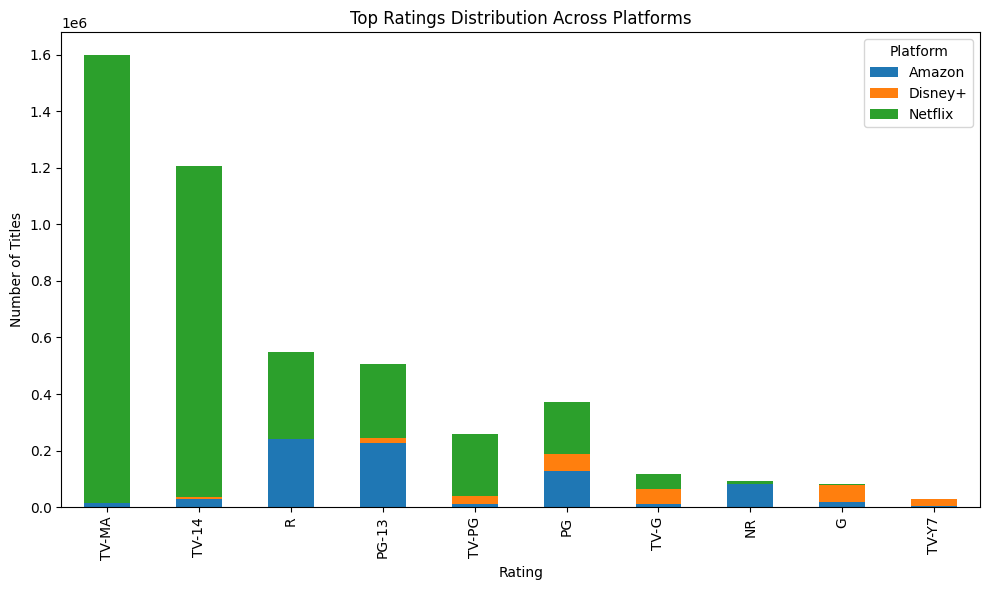

In [70]:
import pandas as pd

rating_counts = df.groupby(['Platform', 'rating']).size().reset_index(name='count')
pivot_rating = rating_counts.pivot(index='rating', columns='Platform', values='count').fillna(0)
pivot_rating = pivot_rating.sort_values(by='Netflix', ascending=False).head(10)

pivot_rating.plot(kind='bar', stacked=True, figsize=(10,6))
plt.title("Top Ratings Distribution Across Platforms")
plt.xlabel("Rating")
plt.ylabel("Number of Titles")
plt.tight_layout()
plt.show()

#### 3)Top Occuring Movie

In [71]:
top_titles = df['title'].value_counts().head(10).reset_index()
top_titles.columns = ['Title', 'Count']
top_titles

,Title,Count
0,Till The Clouds Roll By,51984
1,Evan Almighty,48186
2,The Rocker,40000
3,Something To Sing About,40000
4,American Me,34957
5,Anwar,22500
6,NOVA: Prediction by the Numbers,19881
7,10 Things I Hate About You,17748
8,Knight and Day (Extended Edition),17424
9,Bail Out,17424


#### 4)Top cast members

In [80]:
import pandas as pd
from collections import Counter

# Step 1: Drop missing values in 'actor' and 'title' columns
df_actor = df[['title', 'actor']].dropna().copy()

# Step 2: Split actor string into a list
df_actor['actor'] = df_actor['actor'].str.split(', ')

# Step 3: Explode into multiple rows (one actor per row)
df_actor = df_actor.explode('actor')

# Step 4: Clean whitespace and remove 'unknown'
df_actor['actor'] = df_actor['actor'].str.strip()
df_actor = df_actor[df_actor['actor'].str.lower() != 'unknown']

# Step 5: Drop duplicate title-actor pairs (ensures unique count)
df_actor_unique = df_actor.drop_duplicates(subset=['title', 'actor'])

# Step 6: Count top actors by unique appearances
top_actors = df_actor_unique['actor'].value_counts().head(10)

# Convert to DataFrame for easy viewing
top_actors_df = top_actors.reset_index()
top_actors_df.columns = ['Actor', 'Unique_Title_Count']

print(top_actors_df)

              Actor  Unique_Title_Count
0       Anupam Kher                  60
1    Maggie Binkley                  56
2  Amitabh Bachchan                  47
3    Shah Rukh Khan                  46
4      Jim Cummings                  44
5            Nassar                  43
6      Akshay Kumar                  41
7       Danny Trejo                  39
8  Naseeruddin Shah                  39
9      Paresh Rawal                  39


#### 5)Top Directors

In [81]:
from collections import Counter

# Drop missing values in 'director' and 'title'
df_directors = df[['title', 'director']].dropna().copy()

# Clean: split multiple directors, strip spaces
df_directors['director'] = df_directors['director'].str.split(', ')
df_directors = df_directors.explode('director')
df_directors['director'] = df_directors['director'].str.strip()

# Remove 'unknown' or blanks
df_directors = df_directors[df_directors['director'].str.lower() != 'unknown']
df_directors = df_directors[df_directors['director'] != '']

# Drop duplicate (title, director) pairs to count unique contributions
df_directors.drop_duplicates(subset=['title', 'director'], inplace=True)

# Count number of unique titles per director
top_directors = df_directors['director'].value_counts().head(10).reset_index()
top_directors.columns = ['Director', 'Unique_Title_Count']

# View result
print(top_directors)


                Director  Unique_Title_Count
0            Mark Knight                 114
1          Cannis Holder                  62
2            Jay Chapman                  42
3  Moonbug Entertainment                  37
4     Arthur van Merwijk                  30
5        Manny Rodriguez                  28
6              Jay Karas                  23
7          Rajiv Chilaka                  22
8              Jan Suter                  21
9       Brian Volk-Weiss                  21


#### 6)Genre Popularity

In [82]:
from collections import Counter

# Drop missing values in 'genre' and 'title'
df_genre = df[['title', 'genre']].dropna().copy()

# Split genre column (assuming comma-separated values)
df_genre['genre'] = df_genre['genre'].str.split(', ')
df_genre = df_genre.explode('genre')

# Clean genre names
df_genre['genre'] = df_genre['genre'].str.strip()
df_genre = df_genre[df_genre['genre'].str.lower() != 'unknown']
df_genre = df_genre[df_genre['genre'] != '']

# Drop duplicate title-genre pairs to count unique
df_genre.drop_duplicates(subset=['title', 'genre'], inplace=True)

# Count the number of unique titles per genre
top_genres = df_genre['genre'].value_counts().head(10).reset_index()
top_genres.columns = ['Genre', 'Unique_Title_Count']

# Show result
print(top_genres)


                    Genre  Unique_Title_Count
0                   Drama                3819
1    International Movies                2752
2                  Comedy                2620
3                  Dramas                2427
4                Comedies                1674
5                  Action                1657
6                Suspense                1501
7  International TV Shows                1351
8                    Kids                1225
9             Documentary                1167


In [75]:
from collections import Counter
import pandas as pd

# Filter Disney+ data
disney_df = df[df['Platform'].str.lower() == 'disney+']

# Drop NaN and filter out 'unknown'
actors = disney_df['actor'].dropna()
actors = actors[actors.str.lower() != 'unknown']

# Count actor occurrences
top_actor = Counter(actors).most_common(5)

# Convert to DataFrame
top_actor_df = pd.DataFrame(top_actor, columns=['Actor', 'Count'])

# Display
print("Top Actor from Disney+:")
print(top_actor_df)


Top Actor from Disney+:
          Actor  Count
0  Jim Cummings   1528
1  Jeff Bennett    750
2   Bill Farmer    729
3  Corey Burton    693
4     Tim Allen    681


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6112630 entries, 0 to 6112629
Data columns (total 18 columns):
 #   Column           Dtype  
---  ------           -----  
 0   show_id          object 
 1   type             object 
 2   title            object 
 3   director         object 
 4   cast             object 
 5   country          object 
 6   date_added       object 
 7   release_year     int64  
 8   rating           object 
 9   duration         object 
 10  listed_in        object 
 11  description      object 
 12  added_year       Int64  
 13  genre            object 
 14  actor            object 
 15  year_gap         float64
 16  listed_in_split  object 
 17  Platform         object 
dtypes: Int64(1), float64(1), int64(1), object(15)
memory usage: 845.3+ MB


In [78]:
df = df.drop(['show_id', 'cast', 'listed_in','description','listed_in_split'], axis=1)

In [79]:
df.to_csv("cleaned_streaming_data.csv", index=False)

In [83]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6112630 entries, 0 to 6112629
Data columns (total 13 columns):
 #   Column        Dtype  
---  ------        -----  
 0   type          object 
 1   title         object 
 2   director      object 
 3   country       object 
 4   date_added    object 
 5   release_year  int64  
 6   rating        object 
 7   duration      object 
 8   added_year    Int64  
 9   genre         object 
 10  actor         object 
 11  year_gap      float64
 12  Platform      object 
dtypes: Int64(1), float64(1), int64(1), object(10)
memory usage: 612.1+ MB


In [85]:
df = df.drop(['country','date_added','added_year','year_gap'], axis=1)

In [86]:
df.to_csv("cleaned_streaming_data.csv", index=False)

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6112630 entries, 0 to 6112629
Data columns (total 9 columns):
 #   Column        Dtype 
---  ------        ----- 
 0   type          object
 1   title         object
 2   director      object
 3   release_year  int64 
 4   rating        object
 5   duration      object
 6   genre         object
 7   actor         object
 8   Platform      object
dtypes: int64(1), object(8)
memory usage: 419.7+ MB


In [92]:
df.head()

,type,title,director,release_year,rating,duration,genre,actor,Platform,duration_minutes
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,2015,TV-14,112 min,Comedies,Jace Chapman,Netflix,NaN
1,Movie,Dick Johnson Is Dead,Kirsten Johnson,2015,TV-14,112 min,Comedies,Larisa Oleynik,Netflix,NaN
2,Movie,Dick Johnson Is Dead,Kirsten Johnson,2015,TV-14,112 min,Comedies,Tom Everett Scott,Netflix,NaN
3,Movie,Dick Johnson Is Dead,Kirsten Johnson,2015,TV-14,112 min,Comedies,Steve Zahn,Netflix,NaN
4,Movie,Dick Johnson Is Dead,Kirsten Johnson,2015,TV-14,112 min,Comedies,Mauricio Lara,Netflix,NaN
